In [318]:
#load aiida environment and connect to database
from aiida import load_profile
from aiida.orm import computers
profile = load_profile()
print('profile name : ',profile.name)
print('profile database host name : ',profile.database_hostname)
print('default user : ',profile.default_user)

profile name :  default
profile database host name :  localhost
default user :  r.mozumder@fz-juelich.de


In [319]:
# load classes and functions
from aiida.orm import CifData, Code, Dict, load_node, StructureData 
from aiida.orm import (Group, load_group, load_node, load_code, groups,
                      WorkChainNode, QueryBuilder, CalcJobNode)
from aiida.engine import submit
from aiida.common.exceptions import NotExistent
from aiida_kkr.workflows import kkr_imp_sub_wc, kkr_imp_dos, kkr_imp_wc, kkr_startpot_wc, combine_imps_wc
import numpy as np
from aiida_kkr.calculations import KkrimpCalculation, VoronoiCalculation
import matplotlib.pyplot as plt
from aiida_kkr.tools.common_workfunctions import get_username

In [320]:
from __future__ import print_function
from __future__ import division
from __future__ import absolute_import
from __future__ import unicode_literals
from builtins import object, str
from six.moves import range
from six.moves import input
from masci_tools.io.common_functions import open_general
from masci_tools.io.common_functions import search_string
import numpy as np
from masci_tools.io.common_functions import get_alat_from_bravais
from masci_tools.io.common_functions import vec_to_angles
from aiida.common.constants import elements as PeriodicTableElements
_atomic_numbers = {data['symbol']:num for num,
                data in PeriodicTableElements.items()}
load_stuc = load_node(234)
load_stuc

<StructureData: uuid: c1626804-5b71-450c-91c4-aa7197d85279 (pk: 234)>

In [150]:
node_16215 = load_node(16215)
node_16100 = load_node(16100)
# node_16215.outputs.
# node_16100.outputs.workflow_info.pk

SyntaxError: invalid syntax (<ipython-input-150-9dca4e44ca7d>, line 3)

In [ ]:
# imp_dos_group = load_group(72)

plt.figure()
for i, imp_dos in enumerate(imp_dos_group.nodes[2:4]):
    # plot the contribution of the total impurity cluster into the background
    # we scale this down by 0.5 to have copatible y-scales
    plot_kkr(imp_dos, l_channels=False, strucplot=False, silent=True, label=None,
             noshow=True, nofig=True, color='C'+str(i),
             filled=True, alpha=0.3, yscale=0.5, lw=3
            )
    # highlight the contibution of the impurity (iatom=0)
    plot_kkr(imp_dos, l_channels=False, strucplot=False, silent=True, label=imp_dos.label,
             noshow=True, nofig=True, color='C'+str(i),
             lw=3, iatom=0, 
            )
plt.legend(loc=2, fontsize='large')
plt.title('')
plt.show()

In [ ]:
# imp_dos_group = load_group(72)

plt.figure()
for i, imp_dos in enumerate(imp_dos_group.nodes[2:4]):
    # plot the contribution of the total impurity cluster into the background
    # we scale this down by 0.5 to have copatible y-scales
    plot_kkr(imp_dos, l_channels=False, strucplot=False, silent=True, label=None,
             noshow=True, nofig=True, color='C'+str(i),
             filled=True, alpha=0.3, yscale=0.5, lw=3
            )
#     # highlight the contibution of the impurity (iatom=0)
#     plot_kkr(imp_dos, l_channels=False, strucplot=False, silent=True, label=imp_dos.label,
#              noshow=True, nofig=True, color='C'+str(i),
#              lw=3, iatom=0, 
#             )
plt.legend(loc=2, fontsize='large')
plt.title('')
plt.show()

No handles with labels found to put in legend.


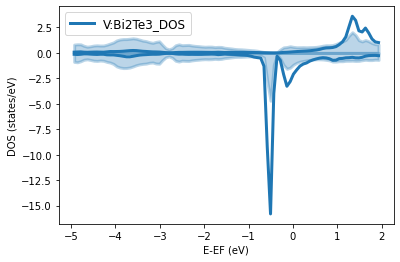

In [138]:
plt.figure()
for i, imp_dos in enumerate(imp_dos_group.nodes[3:4]):
    # plot the contribution of the total impurity cluster into the background
    # we scale this down by 0.5 to have copatible y-scales
    plot_kkr(imp_dos, l_channels=False, strucplot=False, silent=True, label=None,
             noshow=True, nofig=True, color='C'+str(i),
             filled=True, alpha=0.3, yscale=0.5, lw=3
            )
    # highlight the contibution of the impurity (iatom=0)
    plot_kkr(imp_dos, l_channels=False, strucplot=False, silent=True, label=imp_dos.label,
             noshow=True, nofig=True, color='C'+str(i),
             lw=3, iatom=0, 
            )
plt.legend(loc=2, fontsize='large')
plt.title('')
plt.show()

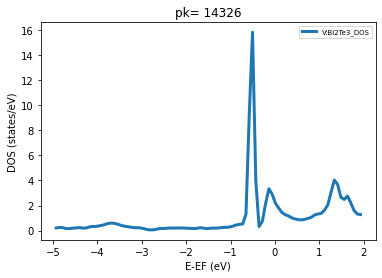

In [139]:
 plot_kkr(imp_dos, l_channels=False, strucplot=False, silent=True, label=imp_dos.label,
             noshow=True, nofig=True, color='C'+str(i),
             lw=3, iatom=0,all_atoms= False, sum_spins= True,)

In [140]:
#imp_kkr_wc = 10085
imp_out = load_node(11948)
# kkrimp_calc = imp_out.outputs.last_calc_output_parameters.get_incoming(KkrimpCalculation).all()
# imp_info = imp_out.outputs.workflow_info.get_incoming(link_label_filter='workflow_info').all()
# # print(imp_info[0].node)
# print(kkrimp_calc[0].node)
ldau_test = imp_out.outputs.workflow_info.get_dict()
# ldau_test

In [274]:
kkr = None
if kkr == None:
    print('ok')

ok


In [261]:
####### NOTE: If this csucessful then please add it into the 'tools_development' ipynb
## In this part the node has been collected to store in new group only considering the kkr_imp_wc node
group_wasmer = load_group(83)
# node_label
debug= False
wasmer_grp_list = list(group_wasmer.nodes)
group_label = 'imp_embedded_Au_by_wasmer'
try:
    new_grp = load_group(node_label)
    print('Group as named %s is already stored, so no need to create the group'%(node_label))
except:
    new_grp = Group(label=group_label)
    new_grp.store()
    print(' A new node created as named %s' %node_label)
new_grp_list = list(new_grp.nodes)
i=0
imp_wc_no = 0
for index in range(len(wasmer_grp_list)):
    node = wasmer_grp_list[index]
    if node.node_type.split('.')[-2]=='WorkChainNode':
        if (u'kkr_imp_wc' == node.process_label):
            imp_wc_no += 1
            if node in new_grp_list[:]:
                print('node {} is already exist'.format(node.pk))
            else:
                new_grp.add_nodes(node)
            if debug:
                print(node.process_label)
                print('pk: %7d'%node.pk)
                print(wasmer_grp_list[i])
                print(node.label)
                
                        
        

print(imp_wc_no)

Group as named imp_embedded_Au_by_wasmer is already stored, so no need to create the group
39


In [46]:
node_20370 = load_node(21245)
node_20370.inputs.wf_parameters.get_dict()

{'hfield': [0.02, 5],
 'nsteps': 100,
 'strmix': 0.005,
 'aggrmix': 0.05,
 'init_pos': None,
 'mag_init': False,
 'mixreduce': 0.5,
 'kkr_runmax': 7,
 'aggressive_mix': 5,
 'broyden-number': 60,
 'accuracy_params': {'NCHEB': None,
  'NPAN_EQ': None,
  'NPAN_LOG': None,
  'RADIUS_LOGPANELS': None},
 'convergence_criterion': 1e-07,
 'threshold_aggressive_mixing': 0.02,
 'threshold_switch_high_accuracy': 0.01}

In [51]:
node_20365 = load_node(21250)
# node_20365.outputs.output_parameters.get_dict()['convergence_group']

In [52]:
wc = load_node(21250)
wc.inputs.parameters.get_dict()

{'XC': None,
 'INS': 1,
 'ICST': None,
 'IMIX': 0,
 'KVREL': None,
 'NCHEB': None,
 'NCOLL': 1,
 'NSPIN': 2,
 'BRYMIX': None,
 'HFIELD': [0.0, 0],
 'ITDBRY': None,
 'MIXFAC': 0.005,
 'QBOUND': 0.02,
 'NPAN_EQ': None,
 'RUNFLAG': None,
 'IMIXSPIN': None,
 'NPAN_LOG': None,
 'SCFSTEPS': 100,
 'TESTFLAG': ['tmatnew'],
 'CALCFORCE': None,
 'SPINORBIT': 1,
 'CALCJIJMAT': None,
 'RADIUS_MIN': None,
 'QBOUND_LDAU': None,
 'NSIMPLEMIXFIRST': None,
 'NPAN_LOGPANELFAC': None,
 'RADIUS_LOGPANELS': None,
 'CALCORBITALMOMENT': 1}

In [53]:
wc = load_node(21257)
wc.inputs.parameters.get_dict()

{'XC': None,
 'INS': 1,
 'ICST': None,
 'IMIX': 5,
 'KVREL': None,
 'NCHEB': None,
 'NCOLL': 1,
 'NSPIN': 2,
 'BRYMIX': None,
 'HFIELD': [0.0, 0],
 'ITDBRY': 60,
 'MIXFAC': 0.05,
 'QBOUND': 1e-07,
 'NPAN_EQ': None,
 'RUNFLAG': None,
 'IMIXSPIN': None,
 'NPAN_LOG': None,
 'SCFSTEPS': 100,
 'TESTFLAG': ['tmatnew'],
 'CALCFORCE': None,
 'SPINORBIT': 1,
 'CALCJIJMAT': None,
 'RADIUS_MIN': None,
 'QBOUND_LDAU': None,
 'NSIMPLEMIXFIRST': 0,
 'NPAN_LOGPANELFAC': None,
 'RADIUS_LOGPANELS': None,
 'CALCORBITALMOMENT': 1}

In [29]:
node_20688 = load_node(20688) # kkr_imp_sub_w
node_20693 = load_node(20693)# calc job
node_20688.inputs.wf_parameters.get_dict()

{'hfield': [0.02, 5],
 'nsteps': 300,
 'strmix': 1e-05,
 'aggrmix': 0.05,
 'init_pos': None,
 'mag_init': False,
 'mixreduce': 0.5,
 'kkr_runmax': 5,
 'aggressive_mix': 5,
 'broyden-number': 20,
 'accuracy_params': {'NCHEB': None,
  'NPAN_EQ': None,
  'NPAN_LOG': None,
  'RADIUS_LOGPANELS': None},
 'convergence_criterion': 1e-07,
 'threshold_aggressive_mixing': 0.005,
 'threshold_switch_high_accuracy': 0.01}

In [30]:

node_20693.inputs.parameters.get_dict()

{'XC': None,
 'INS': 1,
 'ICST': None,
 'IMIX': 0,
 'KVREL': None,
 'NCHEB': None,
 'NCOLL': 1,
 'NSPIN': 2,
 'BRYMIX': None,
 'HFIELD': [0.0, 0],
 'ITDBRY': None,
 'MIXFAC': 1e-05,
 'QBOUND': 0.005,
 'NPAN_EQ': None,
 'RUNFLAG': None,
 'IMIXSPIN': None,
 'NPAN_LOG': None,
 'SCFSTEPS': 300,
 'TESTFLAG': ['tmatnew'],
 'CALCFORCE': None,
 'SPINORBIT': 1,
 'CALCJIJMAT': None,
 'RADIUS_MIN': None,
 'QBOUND_LDAU': None,
 'NSIMPLEMIXFIRST': None,
 'NPAN_LOGPANELFAC': None,
 'RADIUS_LOGPANELS': None,
 'CALCORBITALMOMENT': 1}

In [70]:
node_20331 = load_node(20331)


<Computer: claix18_init (localhost), pk: 2>

In [63]:
path = node_20331.get_remote_workdir()
new_path = path.replace('/'+path.split('/')[-1], '')


In [139]:
path #'/rwthfs/rz/cluster/work/jara0191/ck142666/aiida/computers/claix18_init/43/38/b73e-af13-4035-aa57-efd943dea5fd


'/rwthfs/rz/cluster/work/jara0191/ck142666/aiida/computers/claix18_init/43/38/b73e-af13-4035-aa57-efd943dea5fd'

In [64]:
new_path

'/rwthfs/rz/cluster/work/jara0191/ck142666/aiida/computers/claix18_init/43/38'

In [141]:
from aiida.orm import computers

computer = node_20331.computer
computer_name = computer.label
computer_dir = computer.get_workdir()
conection_to_computer = computer.get_transport()
from aiida.manage.database.delete.nodes import delete_nodes

conection_to_computer.open()
conection_to_computer.is_open

conection_to_computer.rmtree(new_path)
#https://aiida.readthedocs.io/projects/aiida-core/en/v1.5.0/_modules/aiida/manage/database/delete/nodes.html

# node_20354 = load_node(16152)

True

In [138]:
node_20354 = load_node(20531)
dict_1 = node_20354.inputs.parameters.get_dict()
dict_1

{'XC': None,
 'INS': 1,
 'ICST': None,
 'IMIX': 0,
 'KVREL': None,
 'NCHEB': None,
 'NCOLL': 1,
 'NSPIN': 2,
 'BRYMIX': None,
 'HFIELD': [0.0, 0],
 'ITDBRY': None,
 'MIXFAC': 0.02,
 'QBOUND': 0.5,
 'NPAN_EQ': None,
 'RUNFLAG': None,
 'IMIXSPIN': None,
 'NPAN_LOG': None,
 'SCFSTEPS': 300,
 'TESTFLAG': ['tmatnew'],
 'CALCFORCE': None,
 'SPINORBIT': 1,
 'CALCJIJMAT': None,
 'RADIUS_MIN': None,
 'QBOUND_LDAU': None,
 'NSIMPLEMIXFIRST': None,
 'NPAN_LOGPANELFAC': None,
 'RADIUS_LOGPANELS': None,
 'CALCORBITALMOMENT': 1}

In [131]:
node_20354 = load_node(16492)
dict_1 = node_20354.inputs.parameters.get_dict()
dict_1

{'XC': None,
 'INS': 1,
 'ICST': None,
 'IMIX': 5,
 'KVREL': None,
 'NCHEB': None,
 'NCOLL': 1,
 'NSPIN': 2,
 'BRYMIX': None,
 'HFIELD': [0.0, 0],
 'ITDBRY': 20,
 'MIXFAC': 0.05,
 'QBOUND': 1e-07,
 'NPAN_EQ': None,
 'RUNFLAG': None,
 'IMIXSPIN': None,
 'NPAN_LOG': None,
 'SCFSTEPS': 300,
 'TESTFLAG': ['tmatnew'],
 'CALCFORCE': None,
 'SPINORBIT': 1,
 'CALCJIJMAT': None,
 'RADIUS_MIN': None,
 'QBOUND_LDAU': None,
 'NSIMPLEMIXFIRST': 0,
 'NPAN_LOGPANELFAC': None,
 'RADIUS_LOGPANELS': None,
 'CALCORBITALMOMENT': 1}

In [10]:
node_20464 = load_node(20560)
param = node_20464.inputs.wf_parameters.get_dict()
param

{'lmdos': False,
 'hfield': [0.02, 5],
 'nsteps': 300,
 'strmix': 0.005,
 'aggrmix': 0.05,
 'jij_run': True,
 'init_pos': None,
 'mag_init': False,
 'mixreduce': 0.5,
 'kkr_runmax': 5,
 'aggressive_mix': 5,
 'broyden-number': 20,
 'accuracy_params': {'NCHEB': None,
  'NPAN_EQ': None,
  'NPAN_LOG': None,
  'RADIUS_LOGPANELS': None},
 'convergence_criterion': 1e-07,
 'threshold_aggressive_mixing': 0.05}

In [13]:
node_20464 = load_node(20595)
param = node_20464.inputs.wf_parameters.get_dict()
param

{'hfield': [0.02, 5],
 'nsteps': 300,
 'strmix': 0.0001,
 'aggrmix': 0.05,
 'init_pos': None,
 'mag_init': False,
 'mixreduce': 0.5,
 'kkr_runmax': 5,
 'aggressive_mix': 5,
 'broyden-number': 20,
 'accuracy_params': {'NCHEB': None,
  'NPAN_EQ': None,
  'NPAN_LOG': None,
  'RADIUS_LOGPANELS': None},
 'convergence_criterion': 1e-07,
 'threshold_aggressive_mixing': 0.05}

In [99]:
node_20464 = load_node(16336)
param = node_20464.inputs.wf_parameters
param

<Dict: uuid: 8f37b695-b583-4ba6-ae58-4e3b6e9b8c79 (pk: 16198)>

In [105]:
kkr_flex_node = load_node(22253)
kkr_flex_node.inputs.parameters.get_dict()

{'XC': None,
 'INS': 1,
 'ICST': None,
 'IMIX': 5,
 'KVREL': None,
 'NCHEB': None,
 'NCOLL': 1,
 'NSPIN': 2,
 'BRYMIX': None,
 'HFIELD': [0.0, 0],
 'ITDBRY': 60,
 'MIXFAC': 0.008,
 'QBOUND': 1e-07,
 'NPAN_EQ': None,
 'RUNFLAG': None,
 'IMIXSPIN': None,
 'NPAN_LOG': None,
 'SCFSTEPS': 100,
 'TESTFLAG': ['tmatnew'],
 'CALCFORCE': None,
 'SPINORBIT': 1,
 'CALCJIJMAT': None,
 'RADIUS_MIN': None,
 'QBOUND_LDAU': None,
 'NSIMPLEMIXFIRST': 0,
 'NPAN_LOGPANELFAC': None,
 'RADIUS_LOGPANELS': None,
 'CALCORBITALMOMENT': 1}

In [ ]:
{'XC': None,
 'INS': 1,
 'ICST': None,
 'IMIX': 5,
 'KVREL': None,
 'NCHEB': None,
 'NCOLL': 1,
 'NSPIN': 2,
 'BRYMIX': None,
 'HFIELD': [0.0, 0],
 'ITDBRY': 60,
 'MIXFAC': 0.008,
 'QBOUND': 1e-07,
 'NPAN_EQ': None,
 'RUNFLAG': None,
 'IMIXSPIN': None,
 'NPAN_LOG': None,
 'SCFSTEPS': 100,
 'TESTFLAG': ['tmatnew'],
 'CALCFORCE': None,
 'SPINORBIT': 1,
 'CALCJIJMAT': None,
 'RADIUS_MIN': None,
 'QBOUND_LDAU': None,
 'NSIMPLEMIXFIRST': 0,
 'NPAN_LOGPANELFAC': None,
 'RADIUS_LOGPANELS': None,
 'CALCORBITALMOMENT': 1}

In [106]:
# This is for kkrimpcalc step-1
[['NSPIN', 2], ['HFIELD', [0.0, 0]], ['INS', 1], ['NCOLL', 1], ['SPINORBIT', 1], ['SCFSTEPS', 100], ['IMIX', 0], ['MIXFAC', 0.001], ['QBOUND', 0.008], ['TESTFLAG', ['tmatnew']], ['CALCORBITALMOMENT', 1]]
[['NSPIN', 2], ['HFIELD', [0.02, 5]], ['INS', 1], ['NCOLL', 1], ['SPINORBIT', 1], ['SCFSTEPS', 300], ['IMIX', 0], ['MIXFAC', 0.02], ['QBOUND', 0.05], ['TESTFLAG', ['tmatnew']], ['CALCORBITALMOMENT', 1]]
# This is for kkrimpcalc step-2
[['NSPIN', 2], ['HFIELD', [0.0, 0]], ['INS', 1], ['NCOLL', 1], ['SPINORBIT', 1], ['SCFSTEPS', 100], ['IMIX', 5], ['MIXFAC', 0.008], ['ITDBRY', 60], ['QBOUND', 1e-07], ['NSIMPLEMIXFIRST', 0], ['TESTFLAG', ['tmatnew']], ['CALCORBITALMOMENT', 1]]
[['NSPIN', 2], ['HFIELD', [0.0, 0]], ['INS', 1], ['NCOLL', 1], ['SPINORBIT', 1], ['SCFSTEPS', 300], ['IMIX', 5], ['MIXFAC', 0.05], ['ITDBRY', 20], ['QBOUND', 1e-07], ['NSIMPLEMIXFIRST', 0], ['TESTFLAG', ['tmatnew']], ['CALCORBITALMOMENT', 1]]

[['NSPIN', 2],
 ['HFIELD', [0.0, 0]],
 ['INS', 1],
 ['NCOLL', 1],
 ['SPINORBIT', 1],
 ['SCFSTEPS', 100],
 ['IMIX', 5],
 ['MIXFAC', 0.008],
 ['ITDBRY', 60],
 ['QBOUND', 1e-07],
 ['NSIMPLEMIXFIRST', 0],
 ['TESTFLAG', ['tmatnew']],
 ['CALCORBITALMOMENT', 1]]

In [112]:
# some_nodes for working in the dabase :
node_list= {22211 : 'combine_imps_wc',
            22212 : 'create_combined_imp_info_cf',
            22219 : 'update_params_wf',
            22222 : 'KkrCalculation',
            22227 : 'create_out_dict_node',
            22235 : 'kick_out_corestates_wf',
            22241 : 'extract_imp_pot_sfd',
            22230 : 'combine_potentials_cf',
           }

In [123]:
node_dict = {}
for key, value in node_list.items():
    node_name = str(value)+'__'+str(key)
    node_dict[node_name] = load_node(key)


In [124]:
node_dict

{'combine_imps_wc__22211': <WorkChainNode: uuid: a3cf3600-6b5e-4d18-9d0e-2a1698aa7cd8 (pk: 22211) (aiida_kkr.workflows._combine_imps.combine_imps_wc)>,
 'create_combined_imp_info_cf__22212': <CalcFunctionNode: uuid: 7077967d-1c54-4a1b-95b5-33bedabab99d (pk: 22212) (aiida_kkr.tools.combine_imps.create_combined_imp_info_cf)>,
 'update_params_wf__22219': <CalcFunctionNode: uuid: 5fea8b8c-f048-4dcf-99eb-bce5cb55808a (pk: 22219) (aiida_kkr.tools.common_workfunctions.update_params_wf)>,
 'KkrCalculation__22222': <CalcJobNode: uuid: 474bd423-3f84-421a-9f0f-4c1b77885932 (pk: 22222) (aiida.calculations:kkr.kkr)>,
 'create_out_dict_node__22227': <CalcFunctionNode: uuid: 0a1f37e7-b342-4101-b608-84cb22925732 (pk: 22227) (aiida_kkr.tools.save_output_nodes.create_out_dict_node)>,
 'kick_out_corestates_wf__22235': <CalcFunctionNode: uuid: a8ad7fa8-0a78-4576-a453-93c382e57eb3 (pk: 22235) (aiida_kkr.tools.common_workfunctions.kick_out_corestates_wf)>,
 'extract_imp_pot_sfd__22241': <CalcFunctionNode: u

In [138]:
node = node_dict['create_combined_imp_info_cf__22212']
print('process_class: ',str(node.process_class))
print('node_type: ',str(node.node_type))

# str(node.)

process_class:  <function create_combined_imp_info_cf at 0x7f6431e66940>
node_type:  process.calculation.calcfunction.CalcFunctionNode.


In [240]:
qb = QueryBuilder()
ll = list(qb.append([WorkChainNode],
                    filters={
                        'and':[
                            {'attributes.process_label':'combine_imps_wc'},
                            {'or':[
                                {'attributes.process_status': 'excepted'},
                                {'attributes.exit_status':{'!in':[0]}}
                                 ]
                            }
                        ]
                    }
                   
                   
                   ).all())

def check_pk_exist(pk_list, pk):
    for i in pk:
        for j in pk_list:
            if(i==j):
                print('pk-{} is exist in pk_list'.format(i))
                continue

len(ll)

pk_list = [i[0].pk for i in ll]
pk_list.sort()
check_pk_exist(pk_list,[22232])

In [241]:
pk_list.sort()
pk_list[-10:]

[21127, 21192, 21224, 22070, 22120, 22139, 22156, 22172, 22177, 22211]

In [242]:
node_22120 = load_node(22120)
for i in node_22120.attributes_items():
    print(i)

('sealed', True)
('version', {'core': '1.5.2', 'plugin': '1.1.11-dev4'})
('exit_status', 700)
('exit_message', 'The writeout of the host GF failed')
('process_label', 'combine_imps_wc')
('process_state', 'finished')
('stepper_state_info', '4:check_host_gf')


In [245]:
from aiida.manage.database.delete.nodes import delete_nodes

In [254]:
delete_nodes([22070], verbosity=3, dry_run=True,force=False)

I would delete 46 nodes
The nodes I would delete:
   b7b8837e-3040-48b5-bb32-02ff64730412 22070 WorkChainNode Ti:Bi2Te3:V:Bi2Te3
   d7111f2d-9fd5-4894-9b18-4d2568504e7f 22071 CalcFunctionNode create_combined_imp_info_cf
   877be44d-160c-4395-8387-05b85492963f 22072 Dict 
   cffd104c-5538-44c2-8e0c-854ea9c7af6d 22073 Dict 
   abae79b7-7eb2-4a28-b764-59bacf2c7bd8 22076 WorkChainNode GF writeout combined imps
   652266cf-0ab2-41f8-9900-755c3d8e319b 22078 CalcFunctionNode update_params_wf
   2eaec790-73d5-47b0-ac6f-d8c3d1457de8 22079 Dict updated KKR parameters
   22874b7a-7b3f-4e4d-a481-e5c211f8c7da 22081 CalcJobNode KKRFLEX calc.
   6bc415a3-7258-457b-adc3-a5a13996b229 22082 RemoteData 
   aa79b18e-ba63-4fc9-97f5-24596c030879 22083 FolderData 
   95d90626-1f78-4693-bfaf-efa0b8201fc6 22084 Dict 
   a4521c2c-1141-4ce4-9aed-2775d5fa4324 22086 CalcFunctionNode create_out_dict_node
   ec68da8c-5074-4369-a515-4a42a2d93b3b 22087 Dict kkr_flex_wc_results
   28ab1dde-cdc2-4aa4-9bd9-88e72218c63b 2

In [291]:
def find_calcJob(pk_or_node, debug=True):
    
    calcjob_node_list=[]
    wc_node_list = []
    if isinstance( pk_or_node, int):
        if debug:
            print('This is pk')
        node = load_node(pk_or_node)
    else:
        if debug:
            print('This is node')
        node= pk_or_node
        
    ## Use the get_calcjob_wc to get descendent calcjob list and  wc list
    calc_list, wc_list = get_calcjob_wc(node)
    calcjob_node_list += calc_list
    
    while len(wc_list)!=0:
        new_wc_list = []

        for i in wc_list[:]:
            calc_list, wc_list = get_calcjob_wc(i)
            new_wc_list += wc_list
            calcjob_node_list += calc_list
            
        wc_list = new_wc_list

    return calcjob_node_list
    
def get_calcjob_wc(node):
    """
    :param: node
    :return: workchain node list and calcjob node list
    """ 
    from aiida.orm import CalcJobNode, WorkChainNode
    wc = []
    calc_job = []
    
    if node.node_type == 'process.workflow.workchain.WorkChainNode.':
    # here all outgoing worchain node
        out_going_wc = node.get_outgoing(node_class=WorkChainNode).all()
        wc = [i.node for i in out_going_wc[:]]
    # here all outgoing calcjob node
        out_going_calc = node.get_outgoing(node_class=CalcJobNode).all()
        calc_job = [i.node for i in out_going_calc[:]]
                    
    if node.node_type == 'process.calculation.calcjob.CalcJobNode.':
        calc_job.append(node)
    
    return calc_job, wc

In [292]:
calcjob_list = find_calcJob(22070)

This is pk


In [293]:
calcjob_list

[<CalcJobNode: uuid: 22874b7a-7b3f-4e4d-a481-e5c211f8c7da (pk: 22081) (aiida.calculations:kkr.kkr)>,
 <CalcJobNode: uuid: 7adbe50b-ed13-4d16-85f8-bd957ad46f70 (pk: 22096) (aiida.calculations:kkr.kkrimp)>,
 <CalcJobNode: uuid: 65d4c6d9-a03a-4f00-b8db-8031f8f35980 (pk: 22102) (aiida.calculations:kkr.kkrimp)>,
 <CalcJobNode: uuid: 61d0ffd2-1555-4258-a4b0-6c1003c2b505 (pk: 22108) (aiida.calculations:kkr.kkrimp)>,
 <CalcJobNode: uuid: 8e386629-e92b-485b-b9f6-e2357cbbae7c (pk: 22114) (aiida.calculations:kkr.kkrimp)>,
 <CalcJobNode: uuid: 3043754d-7e99-4aac-8f84-bfaa95ec2504 (pk: 22253) (aiida.calculations:kkr.kkrimp)>]

In [376]:
node_22120 = load_node(16195)
ll = list(node_22120.inputs.impurity_info.attributes_keys())
ll

['Rcut', 'Zimp', 'ilayer_center']

In [377]:
node_22120.

SyntaxError: invalid syntax (<ipython-input-377-465a515535bd>, line 1)

In [313]:
qb = QueryBuilder()
node_list = list(qb.append([WorkChainNode],
                    filters={
                        'and':[
                            {'attributes.process_label':'combine_imps_wc'},
                            {'and':[
                                {'attributes.process_status': 'finished'},
                                {'attributes.exit_status':{'in':[0]}}
                                 ]
                            }
                        ]
                    }

                           
                   ).all())


In [398]:
node_16195 = load_node(16100)
node_16195

<WorkChainNode: uuid: c42b89d5-4af1-4177-b030-d877cc8c7bd0 (pk: 16195) (aiida.workflows:kkr.imp)>

In [401]:
qb = QueryBuilder()
qb.append(Dict, filters={'attributes':{'has_key':'ilayer_center'}}, tag='check')  
qb.append(WorkChainNode, with_outgoing='check', tag='check_wc')
qb.append(WorkChainNode, with_descendants='check_wc')

In [402]:
len(data.all())

277

In [407]:
group = load_group(74)
nodes = list(group.nodes)
for node in nodes[:]:
    print(node.pk)
    imp = node.inputs.impurity_info.get_dict()
    print(imp)

16195
{'Rcut': 4.0, 'Zimp': 21, 'ilayer_center': 3}
16215
{'Rcut': 4.0, 'Zimp': 22, 'ilayer_center': 3}
16237
{'Rcut': 4.0, 'Zimp': 23, 'ilayer_center': 3}
16258
{'Rcut': 4.0, 'Zimp': 24, 'ilayer_center': 3}
16279
{'Rcut': 4.0, 'Zimp': 25, 'ilayer_center': 3}
16300
{'Rcut': 4.0, 'Zimp': 26, 'ilayer_center': 3}
16349
{'Rcut': 4.0, 'Zimp': 27, 'ilayer_center': 3}
16369
{'Rcut': 4.0, 'Zimp': 28, 'ilayer_center': 3}
16100
{'Rcut': 4.0, 'Zimp': [26.0], 'ilayer_center': 3}
